## Import Modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd
from numpy import *

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from scipy import stats
import pandas as pd

## Load connectome data, organize matrix

In [2]:
test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_AD.mat')
AD_2009=np.array(test['connectome'])
print(AD_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_count.mat')
count_2009=np.array(test['connectome'])
print(count_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_FA.mat')
FA_2009=np.array(test['connectome'])
print(FA_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_length.mat')
length_2009=np.array(test['connectome'])
print(length_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_MD.mat')
MD_2009=np.array(test['connectome'])
print(MD_2009.shape)

test=scipy.io.loadmat('Connectome_group_aparc.a2009s+aseg_RD.mat')
RD_2009=np.array(test['connectome'])
print(RD_2009.shape)




test=scipy.io.loadmat('Connectome_group_aparc+aseg_AD.mat')
AD_aseg=np.array(test['connectome'])
print(AD_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_count.mat')
count_aseg=np.array(test['connectome'])
print(count_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_FA.mat')
FA_aseg=np.array(test['connectome'])
print(FA_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_length.mat')
length_aseg=np.array(test['connectome'])
print(length_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_MD.mat')
MD_aseg=np.array(test['connectome'])
print(MD_aseg.shape)

test=scipy.io.loadmat('Connectome_group_aparc+aseg_RD.mat')
RD_aseg=np.array(test['connectome'])
print(RD_aseg.shape)

zero_AD=np.zeros([164,164,303])
zero_count=np.zeros([164,164,303])
zero_FA=np.zeros([164,164,303])
zero_length=np.zeros([164,164,303])
zero_MD=np.zeros([164,164,303])
zero_RD=np.zeros([164,164,303])

zero_AD[40:124,40:124,:]=AD_aseg
zero_count[40:124,40:124,:]=count_aseg
zero_FA[40:124,40:124,:]=FA_aseg
zero_length[40:124,40:124,:]=length_aseg
zero_MD[40:124,40:124,:]=MD_aseg
zero_RD[40:124,40:124,:]=RD_aseg


X=np.zeros([164,164,303,12])
X[:,:,:,0]=AD_2009
X[:,:,:,1]=count_2009
X[:,:,:,2]=FA_2009
X[:,:,:,3]=length_2009
X[:,:,:,4]=MD_2009
X[:,:,:,5]=RD_2009
X[:,:,:,6]=zero_AD
X[:,:,:,7]=zero_count
X[:,:,:,8]=zero_FA
X[:,:,:,9]=zero_length
X[:,:,:,10]=zero_MD
X[:,:,:,11]=zero_RD


print(X.shape)
X=X.transpose([2,0,1,3])
print(X.shape)

(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(164, 164, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(84, 84, 303)
(164, 164, 303, 12)
(303, 164, 164, 12)


## Read in data and labels, organize data for classification

In [3]:
alldata=pd.read_csv('PLA_MOR_136_v1.csv',header=0)
print(alldata.shape)
alldata=np.array(alldata)
datasubjid=alldata[:,0]

list_subjs=pd.read_csv('list_subject_303_connectome.csv',header=0)
#list_subjs=list_subjs.apply(lambda x: x.str.slice(0,6))
print(list_subjs.shape)


filtindex=np.isin(list_subjs,datasubjid)
filtindex=filtindex.ravel()

X=X[filtindex]
print(X.shape)
listofx=list_subjs[filtindex]
#print(listofx)

reverseindex=np.isin(datasubjid,list_subjs)
reverseindex=reverseindex.ravel()
print(reverseindex.shape)

y=alldata[:,1]
y=np.array(y,dtype=np.float64)
y=y[reverseindex]
labelofy=alldata[:,0]
labelofy=labelofy[reverseindex]
print(y.shape)


removeblank=isnan(y)
y_connectome=y[~removeblank]
print(y_connectome.shape)

X=X[~removeblank]
print(X.shape)

newalldata=pd.read_csv('PLA_MOR_136_v1.csv',header=0)
newalldata=np.array(newalldata)
newalldata=newalldata[reverseindex,:]
newalldata=newalldata[~removeblank,:]

Xvar=newalldata[:,(2,4,7,8,25,1047,1048,1049,1050,1051,1052,1053,1054)]
print(Xvar.shape)
Xvar=np.array(Xvar,dtype=np.float32)
wherenan=isnan(Xvar)
Xvar[wherenan]=0

delta_track=newalldata[:,19]-newalldata[:,7]



(136, 1055)
(303, 1)
(134, 164, 164, 12)
(136,)
(134,)
(111,)
(111, 164, 164, 12)
(111, 13)


In [4]:
fill=np.zeros([111,164,164,12])

fill[:,:,:,0]=stats.zscore(X[:,:,:,0])
fill[:,:,:,1]=stats.zscore(X[:,:,:,1])
fill[:,:,:,2]=stats.zscore(X[:,:,:,2])
fill[:,:,:,3]=stats.zscore(X[:,:,:,3])
fill[:,:,:,4]=stats.zscore(X[:,:,:,4])
fill[:,:,:,5]=stats.zscore(X[:,:,:,5])
fill[:,:,:,6]=stats.zscore(X[:,:,:,6])
fill[:,:,:,7]=stats.zscore(X[:,:,:,7])
fill[:,:,:,8]=stats.zscore(X[:,:,:,8])
fill[:,:,:,9]=stats.zscore(X[:,:,:,9])
fill[:,:,:,10]=stats.zscore(X[:,:,:,10])
fill[:,:,:,11]=stats.zscore(X[:,:,:,11])
wherenan=isnan(fill)
fill[wherenan]=0
X_connectome=fill

C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


## Freesurfer data load in

In [5]:
test=scipy.io.loadmat('fs_group_aparc_all_4_measures_in_matrix.mat')
aparc_free=np.array(test['DATA'])
print(aparc_free.shape)

test=scipy.io.loadmat('fs_group_aparc2009_all_4_measures_in_matrix.mat')
aparc2009_free=np.array(test['DATA'])
print(aparc2009_free.shape)

X=np.concatenate((aparc_free,aparc2009_free),axis=3)
print(X.shape)

X=X.transpose([2,0,1,3])
print(X.shape)

(13, 13, 323, 4)
(13, 13, 323, 4)
(13, 13, 323, 8)
(323, 13, 13, 8)


In [6]:
alldata=pd.read_csv('PLA_MOR_136_v1.csv',header=0)
print(alldata.shape)
alldata=np.array(alldata)
datasubjid=alldata[:,0]

list_subjs=pd.read_csv('list_fs_all_323.csv',header=0)
list_subjs=list_subjs.apply(lambda x: x.str.slice(0,6))
print(list_subjs.shape)



filtindex=np.isin(list_subjs,labelofy)
filtindex=filtindex.ravel()

X=X[filtindex]
print(X.shape)

X=X[~removeblank]
print(X.shape)


(136, 1055)
(323, 1)
(134, 13, 13, 8)
(111, 13, 13, 8)


In [7]:
fill=np.zeros([111,13,13,8])

fill[:,:,:,0]=stats.zscore(X[:,:,:,0])
fill[:,:,:,1]=stats.zscore(X[:,:,:,1])
fill[:,:,:,2]=stats.zscore(X[:,:,:,2])
fill[:,:,:,3]=stats.zscore(X[:,:,:,3])
fill[:,:,:,4]=stats.zscore(X[:,:,:,4])
fill[:,:,:,5]=stats.zscore(X[:,:,:,5])
fill[:,:,:,6]=stats.zscore(X[:,:,:,6])
fill[:,:,:,7]=stats.zscore(X[:,:,:,7])
wherenan=isnan(fill)
fill[wherenan]=0
X_freesurf=fill

C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [8]:
zeropad=np.zeros([111,164,164,8])
zeropad[:,76:89,76:89,:]=X_freesurf
X_freesurf=zeropad
print(X_freesurf.shape)

(111, 164, 164, 8)


## connectome all

In [9]:
Xnew=X_connectome

In [11]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_flexchannel import cnn_training
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import metrics

rskf=RepeatedStratifiedKFold(n_splits=10,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
result_accuracies=[]
result_sensitivity=[]
result_specificity=[]
result_f1s=[]
store_proba=[]
store_predictedv=[]
store_percent=[]

for train_index,test_index in rskf.split(Xnew,y_connectome):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xnew[train_index],Xnew[test_index]
    y_train,y_test=y_connectome[train_index],y_connectome[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]

    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel,percentage=cnn_training(X_train,y_train,X_test,y_test,fc_units=[2000,100,2], 
                 conv_featmap=[5,5,5],l2_norm=0.1,seed=235,
                 learning_rate=1e-2,epoch=350,batch_size=9,imglen=164,channum=12)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()
    
    log_f1 = f1_score(roc_truelabel,roc_pred)
    log_confuse= metrics.confusion_matrix(roc_truelabel,roc_pred)
    TP = log_confuse[1, 1]
    TN = log_confuse[0, 0]
    FP = log_confuse[0, 1]
    FN = log_confuse[1, 0]
    log_sen=metrics.recall_score(roc_truelabel,roc_pred)
    log_spec=TN / (TN + FP)
    result_accuracies.append(record_acc)
    result_sensitivity.append(log_sen)
    result_specificity.append(log_spec)
    result_f1s.append(log_f1)
    
    probability=np.zeros([test_index.shape[0]])
    #index_percent=np.argmax(percentage,axis=1)
    for i in range(len(roc_pred)):
        if roc_pred[i]==0:
            probability[i]=percentage[i,1]
        else:
            probability[i]=percentage[i,1]
    store_proba.extend(probability)
    store_predictedv.extend(roc_pred)
    store_percent.extend(percentage)

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print(' average accuracy is: ',mean_acc)
print(' standard deviation is: ',mean_std)

mean_sen=np.mean(np.array(result_sensitivity))
std_sen=np.std(np.array(result_sensitivity))
mean_spec=np.mean(np.array(result_specificity))
std_spec=np.std(np.array(result_specificity))
mean_f1s=np.mean(np.array(result_f1s))
std_f1s=np.std(np.array(result_f1s))
print('Sensitivity mean: ',mean_sen)
print('Sensitivity std: ',std_sen)
print('Specificity mean: ',mean_spec)
print('Specificity std: ',std_spec)
print('F1s mean: ',mean_f1s)
print('F1s std: ',std_f1s)



fpr,tpr,_=roc_curve(truelabel,store_proba)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/embarc_project/Figures/plac_conall_curve_CNN.pdf')
plt.show()




Number of training points:  (99,)
Number of testing points:  (12,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 33.33333333333333%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 41.666666666666664%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:66 accuracy: 50.0%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:110 accuracy: 66.66666666666666%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
Best validation accuracy! iteration:330 accuracy: 75.0%
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 

KeyboardInterrupt: 

## morph+connectome all

In [40]:
Xnew=np.concatenate((X_connectome,X_freesurf),axis=3)
print(Xnew.shape)

(111, 164, 164, 20)


Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 39.130434782608695%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:99 accuracy: 52.17391304347826%
epoch 12 
Best validation accuracy! iteration:108 accuracy: 56.52173913043478%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
Best validation accuracy! iteration:387 accuracy: 65.21739130434783%
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 


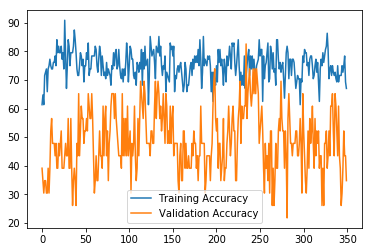

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 50.0%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 54.54545454545455%
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:54 accuracy: 68.18181818181819%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoc

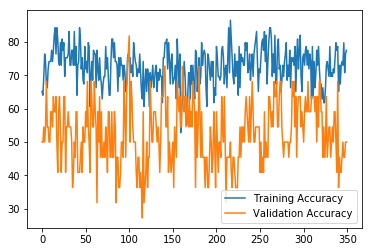

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 59.09090909090909%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:81 accuracy: 68.18181818181819%
epoch 10 
Best validation accuracy! iteration:90 accuracy: 72.72727272727272%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
Best validation accuracy! iteration:333 accuracy: 77.27272727272728%
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
ep

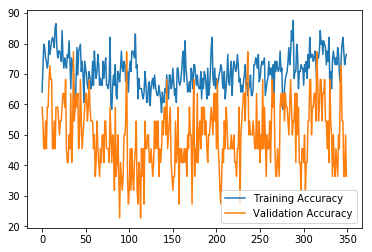

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 50.0%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 54.54545454545455%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
Best validation accuracy! iteration:261 accuracy: 59.09090909090909%
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epo

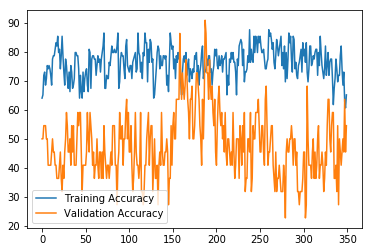

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 54.54545454545455%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 68.18181818181819%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
Best validation accuracy! iteration:459 accuracy: 72.72727272727272%
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 


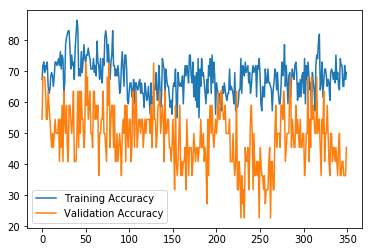

Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 39.130434782608695%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 56.52173913043478%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:108 accuracy: 60.869565217391305%
epoch 13 
Best validation accuracy! iteration:117 accuracy: 65.21739130434783%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:171 accuracy: 69.56521739130434%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accuracy! iteration:288 accuracy: 78.26086956521739%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
e

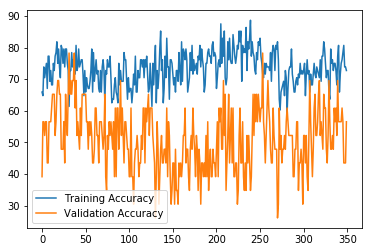

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:153 accuracy: 50.0%
epoch 18 
epoch 19 
Best validation accuracy! iteration:171 accuracy: 59.09090909090909%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
Best validation accuracy! iteration:333 accuracy: 63.63636363636363%
epoch 38 
epoch 39 
epoch 40 
Best validation accuracy! iteration:360 accuracy: 68.18181818181819%
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoc

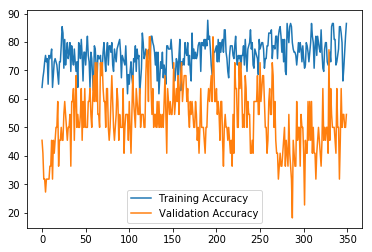

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.45454545454545%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 54.54545454545455%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:99 accuracy: 59.09090909090909%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
Best validation accuracy! iteration:342 accuracy: 68.18181818181819%
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Best validation accuracy! iteration:450 ac

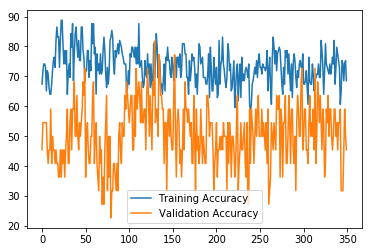

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:72 accuracy: 54.54545454545455%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:207 accuracy: 63.63636363636363%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accuracy! iteration:288 accuracy: 68.18181818181819%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoc

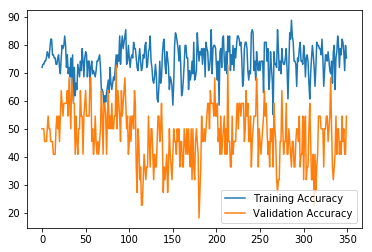

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 63.63636363636363%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:153 accuracy: 68.18181818181819%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epo

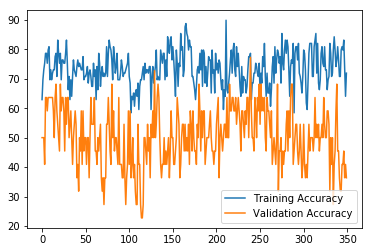

Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 39.130434782608695%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 43.47826086956522%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 52.17391304347826%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 60.869565217391305%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:153 accuracy: 65.21739130434783%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:225 accuracy: 69.56521739130434%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epo

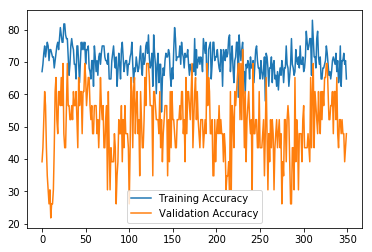

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:99 accuracy: 50.0%
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:126 accuracy: 54.54545454545455%
epoch 15 
epoch 16 
Best validation accuracy! iteration:144 accuracy: 59.09090909090909%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:216 accuracy: 63.63636363636363%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
Best validation accuracy! iteration:270 accuracy: 72.72727272727272%
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 

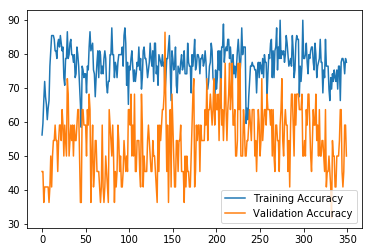

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 59.09090909090909%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 77.27272727272728%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 

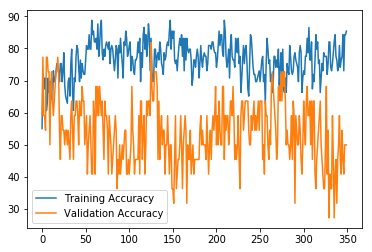

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 59.09090909090909%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
Best validation accuracy! iteration:306 accuracy: 63.63636363636363%
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
Best validation accuracy! iteration:378 accuracy: 68.18181818181819%
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 

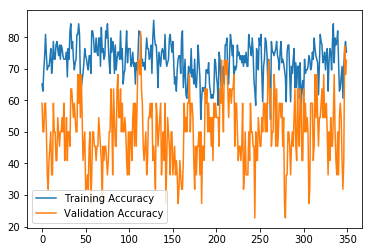

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:54 accuracy: 50.0%
epoch 7 
epoch 8 
epoch 9 
Best validation accuracy! iteration:81 accuracy: 54.54545454545455%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:135 accuracy: 59.09090909090909%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch

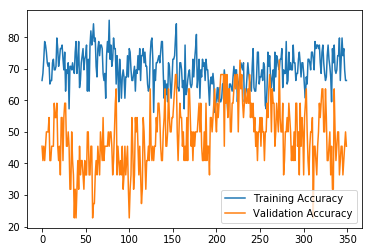

Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 47.82608695652174%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
Best validation accuracy! iteration:135 accuracy: 52.17391304347826%
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Best validation accuracy! iteration:180 accuracy: 56.52173913043478%
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
Best validation accuracy! iteration:360 accuracy: 60.869565217391305%
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
Best validation accuracy! ite

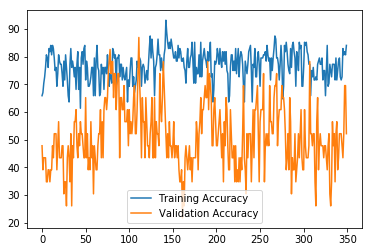

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 77.27272727272728%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 7

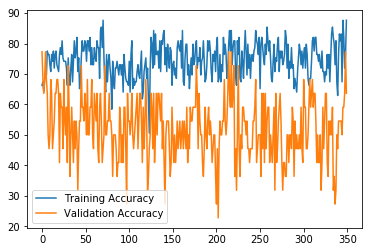

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 31.818181818181813%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 36.36363636363637%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 40.90909090909091%
epoch 5 
Best validation accuracy! iteration:45 accuracy: 45.45454545454545%
epoch 6 
Best validation accuracy! iteration:54 accuracy: 54.54545454545455%
epoch 7 
Best validation accuracy! iteration:63 accuracy: 63.63636363636363%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
Best validation accuracy! iteration:297 accuracy: 77.27272727272728%
epoch 3

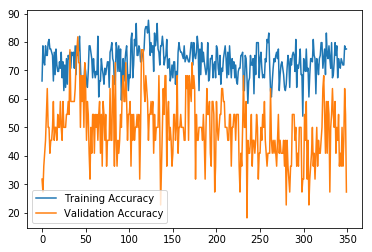

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 40.90909090909091%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 59.09090909090909%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 63.63636363636363%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
Best validation accuracy! iteration:351 accuracy: 68.18181818181819%
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
ep

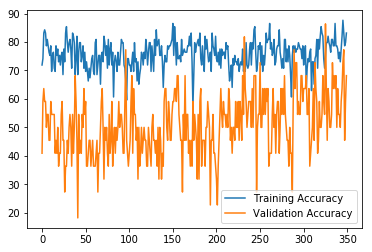

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 63.63636363636363%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 72.72727272727272%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 

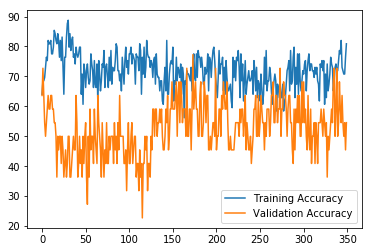

Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 34.78260869565217%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 39.130434782608695%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 43.47826086956522%
epoch 6 
Best validation accuracy! iteration:54 accuracy: 52.17391304347826%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:108 accuracy: 60.869565217391305%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
Best validation accuracy! iteration:243 accuracy: 78.26086956521739%
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epo

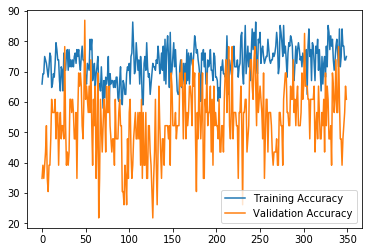

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 72.72727272727272%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 7

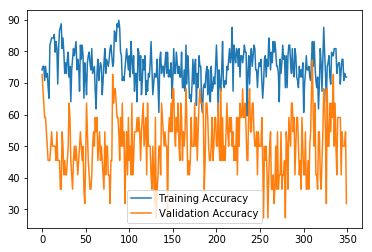

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 31.818181818181813%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:153 accuracy: 45.45454545454545%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:234 accuracy: 50.0%
epoch 27 
epoch 28 
Best validation accuracy! iteration:252 accuracy: 59.09090909090909%
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
ep

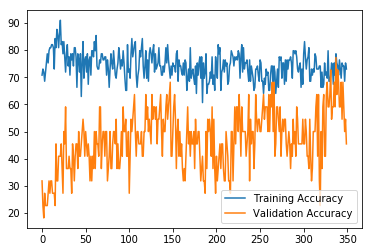

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 72.72727272727272%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 7

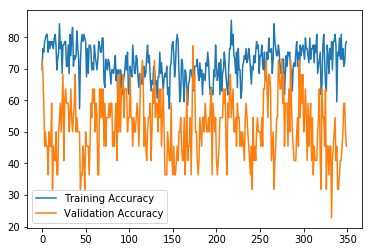

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 50.0%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 54.54545454545455%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:63 accuracy: 59.09090909090909%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
Best validation accuracy! iteration:252 accuracy: 68.18181818181819%
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch

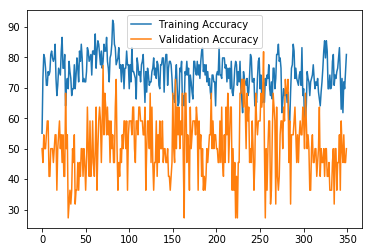

 average accuracy is:  80.16600790513833
 standard deviation is:  4.803592941508844
Sensitivity mean:  0.7561111111111112
Sensitivity std:  0.11500670941243621
Specificity mean:  0.8285714285714285
Specificity std:  0.06998542122237651
F1s mean:  0.7352145068553737
F1s std:  0.07103175444938035


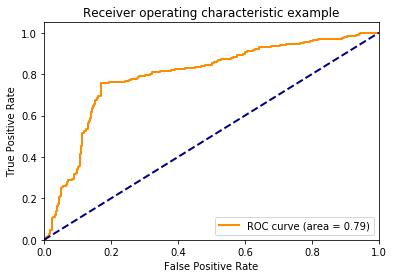

In [41]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_flexchannel import cnn_training
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import metrics

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
result_accuracies=[]
result_sensitivity=[]
result_specificity=[]
result_f1s=[]
store_proba=[]
store_predictedv=[]
store_percent=[]

for train_index,test_index in rskf.split(Xnew,y_connectome):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xnew[train_index],Xnew[test_index]
    y_train,y_test=y_connectome[train_index],y_connectome[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]

    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel,percentage=cnn_training(X_train,y_train,X_test,y_test,fc_units=[2000,100,2], 
                 conv_featmap=[5,5,5],l2_norm=0.1,seed=235,
                 learning_rate=1e-2,epoch=350,batch_size=9,imglen=164,channum=20)
    print(roc_pred)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()
    
    log_f1 = f1_score(roc_truelabel,roc_pred)
    log_confuse= metrics.confusion_matrix(roc_truelabel,roc_pred)
    TP = log_confuse[1, 1]
    TN = log_confuse[0, 0]
    FP = log_confuse[0, 1]
    FN = log_confuse[1, 0]
    log_sen=metrics.recall_score(roc_truelabel,roc_pred)
    log_spec=TN / (TN + FP)
    result_accuracies.append(record_acc)
    result_sensitivity.append(log_sen)
    result_specificity.append(log_spec)
    result_f1s.append(log_f1)
    
    probability=np.zeros([test_index.shape[0]])
    #index_percent=np.argmax(percentage,axis=1)
    for i in range(len(roc_pred)):
        if roc_pred[i]==0:
            probability[i]=percentage[i,1]
        else:
            probability[i]=percentage[i,1]
    store_proba.extend(probability)
    store_predictedv.extend(roc_pred)
    store_percent.extend(percentage)

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print(' average accuracy is: ',mean_acc)
print(' standard deviation is: ',mean_std)

mean_sen=np.mean(np.array(result_sensitivity))
std_sen=np.std(np.array(result_sensitivity))
mean_spec=np.mean(np.array(result_specificity))
std_spec=np.std(np.array(result_specificity))
mean_f1s=np.mean(np.array(result_f1s))
std_f1s=np.std(np.array(result_f1s))
print('Sensitivity mean: ',mean_sen)
print('Sensitivity std: ',std_sen)
print('Specificity mean: ',mean_spec)
print('Specificity std: ',std_spec)
print('F1s mean: ',mean_f1s)
print('F1s std: ',std_f1s)



fpr,tpr,_=roc_curve(truelabel,store_proba)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/embarc_project/Figures/plac_all_curve_CNN.pdf')
plt.show()

scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_all_percentage.mat',mdict={'result':store_percent})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_all_truelabels.mat',mdict={'result':truelabel})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_all_predictedv.mat',mdict={'result':store_predictedv})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_all_probabilities.mat',mdict={'result':store_proba})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_all_sensitivity.mat',mdict={'result':result_sensitivity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_all_specificity.mat',mdict={'result':result_specificity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_all_f1s.mat',mdict={'result':result_f1s})

## Morph + Connectome + clinical

In [42]:
Xnew=np.concatenate((X_connectome,X_freesurf),axis=3)
print(Xnew.shape)

(111, 164, 164, 20)


Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 47.82608695652174%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 52.17391304347826%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 65.21739130434783%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accuracy! iteration:288 accuracy: 69.56521739130434%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
Best validation accuracy! iteration:414 accuracy: 73.91304347826087%
epoch 47 
epo

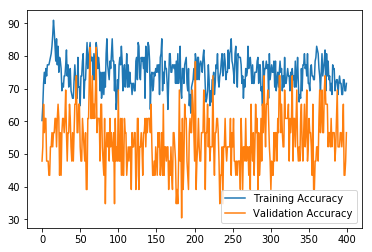

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 54.54545454545455%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 59.09090909090909%
epoch 6 
Best validation accuracy! iteration:54 accuracy: 63.63636363636363%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
e

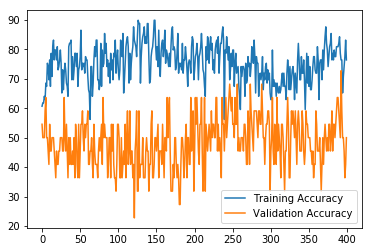

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 72.72727272727272%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 7

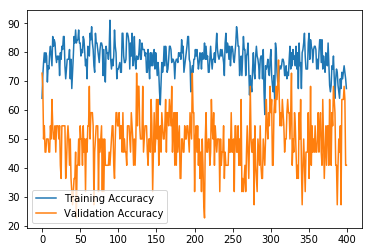

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:108 accuracy: 54.54545454545455%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:144 accuracy: 59.09090909090909%
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
Best validation accuracy! iteration:261 accuracy: 63.63636363636363%
epoch 30 
Best validation accuracy! iteration:270 accuracy: 68.18181818181819%
epoch 31 
epoch 32 
Best validation accuracy! iteration:288 accuracy: 72.72727272727272%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch

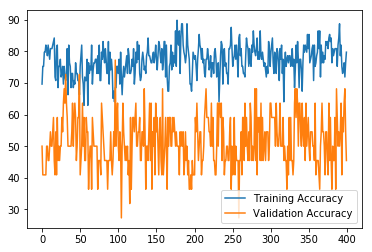

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 40.90909090909091%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 45.45454545454545%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 50.0%
epoch 5 
Best validation accuracy! iteration:45 accuracy: 54.54545454545455%
epoch 6 
Best validation accuracy! iteration:54 accuracy: 59.09090909090909%
epoch 7 
Best validation accuracy! iteration:63 accuracy: 63.63636363636363%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:216 accuracy: 68.18181818181819%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
e

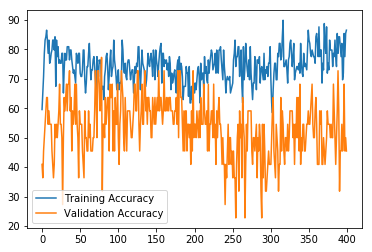

Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 43.47826086956522%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:225 accuracy: 56.52173913043478%
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68

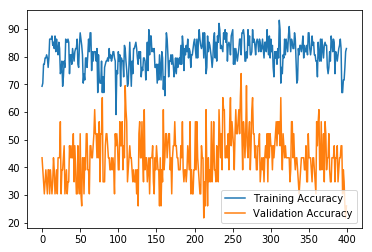

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 63.63636363636363%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:216 accuracy: 68.18181818181819%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
Best validation accuracy! iteration:405 accuracy: 72.72727272727272%
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
e

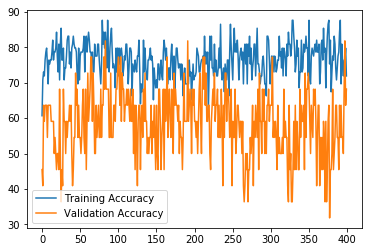

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 36.36363636363637%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 45.45454545454545%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 50.0%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 54.54545454545455%
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:63 accuracy: 59.09090909090909%
epoch 8 
Best validation accuracy! iteration:72 accuracy: 63.63636363636363%
epoch 9 
Best validation accuracy! iteration:81 accuracy: 68.18181818181819%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
Best validation accuracy! iteration:279 ac

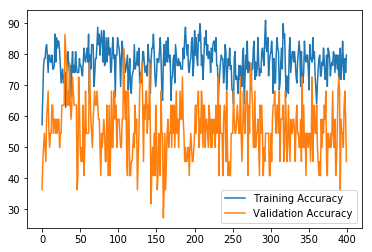

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 36.36363636363637%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 54.54545454545455%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 59.09090909090909%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:72 accuracy: 63.63636363636363%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:171 accuracy: 68.18181818181819%
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:216 accuracy: 77.27272727272728%
epoch 25 
epoch 26 
Best validation accuracy! iteration:234 accuracy: 81.81818181818181%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 

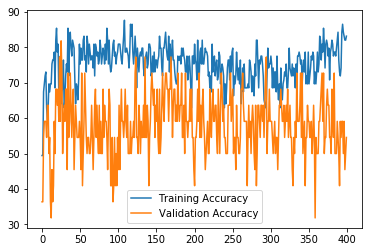

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 59.09090909090909%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:54 accuracy: 63.63636363636363%
epoch 7 
epoch 8 
Best validation accuracy! iteration:72 accuracy: 68.18181818181819%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
Best validation accuracy! iteration:207 accuracy: 72.72727272727272%
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
ep

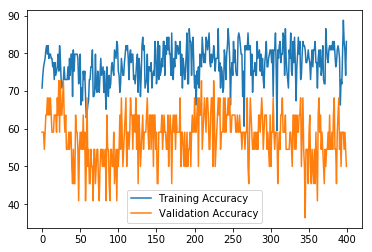

Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 52.17391304347826%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:99 accuracy: 65.21739130434783%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 

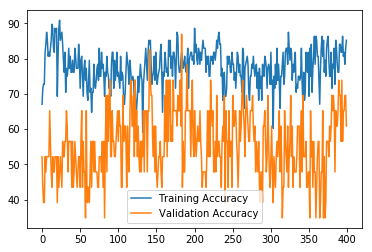

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 59.09090909090909%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 63.63636363636363%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
Best validation accuracy! iteration:171 accuracy: 68.18181818181819%
epoch 20 
epoch 21 
Best validation accuracy! iteration:189 accuracy: 72.72727272727272%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
e

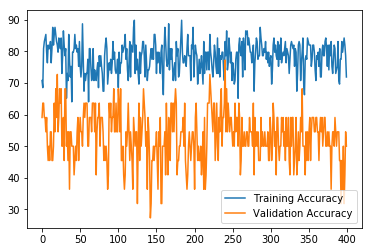

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 50.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation accuracy! iteration:144 accuracy: 59.09090909090909%
epoch 17 
Best validation accuracy! iteration:153 accuracy: 63.63636363636363%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
ep

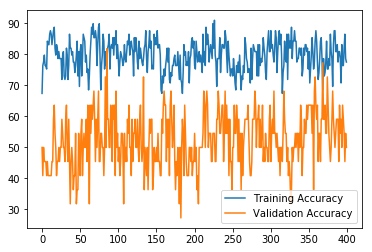

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 68.18181818181819%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoch 63 
epoch 64 
epoch 65 
epoch 66 
epoch 67 
epoch 68 
epoch 69 
epoch 70 
epoch 71 
epoch 72 
epoch 73 
epoch 74 
epoch 7

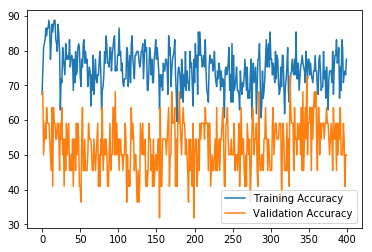

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:117 accuracy: 50.0%
epoch 14 
Best validation accuracy! iteration:126 accuracy: 54.54545454545455%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
Best validation accuracy! iteration:243 accuracy: 59.09090909090909%
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
Best validation accuracy! iteration:405 accuracy: 63.63636363636363%
epoch 46 
epoch 47 
epoch 48 
epoc

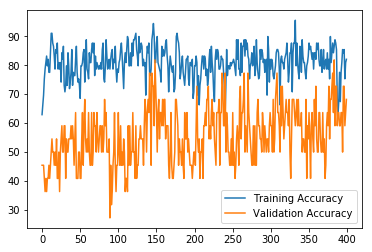

Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 56.52173913043478%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:90 accuracy: 60.869565217391305%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:189 accuracy: 65.21739130434783%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
Best validation accuracy! iteration:243 accuracy: 69.56521739130434%
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 


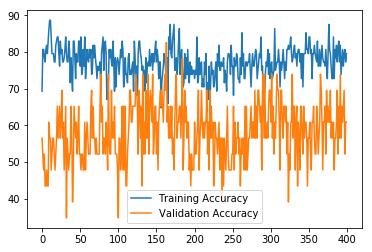

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.45454545454545%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:126 accuracy: 59.09090909090909%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:198 accuracy: 63.63636363636363%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:234 accuracy: 72.72727272727272%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 


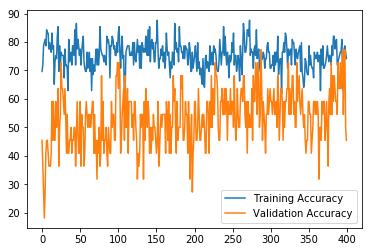

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 50.0%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 54.54545454545455%
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 59.09090909090909%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:90 accuracy: 63.63636363636363%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
Best validation accuracy! iteration:198 accuracy: 77.27272727272728%
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 4

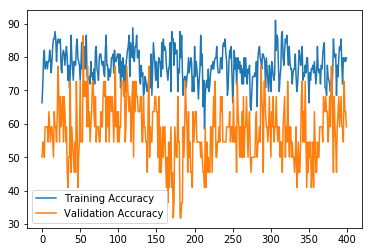

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.45454545454545%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 59.09090909090909%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
Best validation accuracy! iteration:189 accuracy: 68.18181818181819%
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 


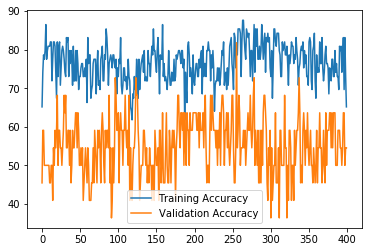

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 50.0%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 59.09090909090909%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:54 accuracy: 63.63636363636363%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 
epoch 62 
epoc

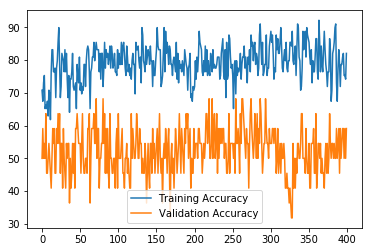

Number of training points:  (88,)
Number of testing points:  (23,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 47.82608695652174%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
Best validation accuracy! iteration:45 accuracy: 56.52173913043478%
epoch 6 
Best validation accuracy! iteration:54 accuracy: 60.869565217391305%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accuracy! iteration:288 accuracy: 65.21739130434783%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
B

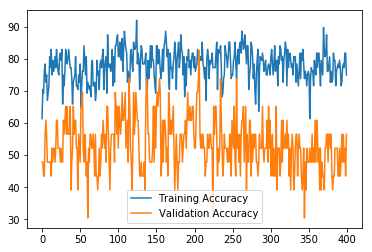

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 40.90909090909091%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 45.45454545454545%
epoch 3 
epoch 4 
Best validation accuracy! iteration:36 accuracy: 50.0%
epoch 5 
Best validation accuracy! iteration:45 accuracy: 54.54545454545455%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
Best validation accuracy! iteration:234 accuracy: 59.09090909090909%
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
Best validation accuracy! iteration:279 accuracy: 63.63636363636363%
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
Best validation accuracy! it

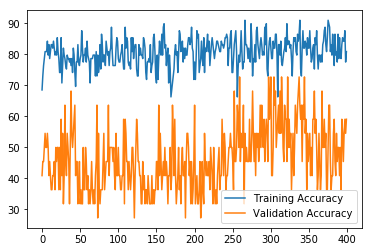

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 40.90909090909091%
epoch 2 
epoch 3 
Best validation accuracy! iteration:27 accuracy: 50.0%
epoch 4 
Best validation accuracy! iteration:36 accuracy: 63.63636363636363%
epoch 5 
Best validation accuracy! iteration:45 accuracy: 68.18181818181819%
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
Best validation accuracy! iteration:378 accuracy: 72.72727272727272%
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 4

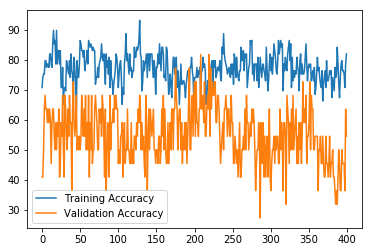

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 45.45454545454545%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 54.54545454545455%
epoch 3 
Best validation accuracy! iteration:27 accuracy: 63.63636363636363%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
Best validation accuracy! iteration:216 accuracy: 68.18181818181819%
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
Best validation accuracy! iteration:387 accuracy: 72.72727272727272%
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epo

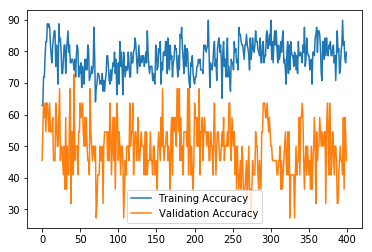

Number of training points:  (89,)
Number of testing points:  (22,)
Building Network Parameters: 
fc_units=[2000, 100, 2]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 9
epoch 1 
Best validation accuracy! iteration:9 accuracy: 59.09090909090909%
epoch 2 
Best validation accuracy! iteration:18 accuracy: 68.18181818181819%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
Best validation accuracy! iteration:261 accuracy: 77.27272727272728%
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
epoch 51 
epoch 52 
epoch 53 
epoch 54 
epoch 55 
epoch 56 
epoch 57 
epoch 58 
epoch 59 
epoch 60 
epoch 61 


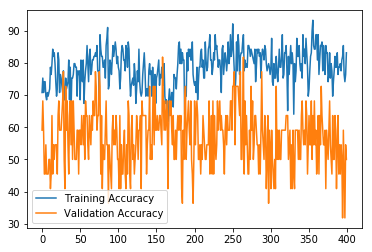

 average accuracy is:  78.89328063241106
 standard deviation is:  4.982746089903374
Sensitivity mean:  0.7438888888888888
Sensitivity std:  0.13205872244134237
Specificity mean:  0.8142857142857142
Specificity std:  0.04948716593053934
F1s mean:  0.7171751853237922
F1s std:  0.0855774860324449


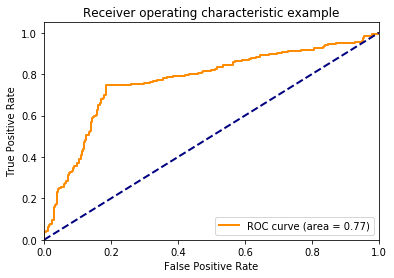

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_flex_merge import cnnfm_training
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn import metrics

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]

result_accuracies=[]
result_sensitivity=[]
result_specificity=[]
result_f1s=[]

store_proba=[]

store_predictedv=[]
store_percent=[]

store_demos=[]
store_deltas=[]

for train_index,test_index in rskf.split(Xnew,y_connectome):
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=Xnew[train_index],Xnew[test_index]
    y_train,y_test=y_connectome[train_index],y_connectome[test_index]
    X_trainvar,X_valvar=Xvar[train_index],Xvar[test_index]
    mask_train = np.random.choice(len(X_train),len(X_train), replace=False)
    X_train=X_train[mask_train,:,:,:]
    y_train=y_train[mask_train,]
    X_trainvar=X_trainvar[mask_train,:]
    _,tracking_del=delta_track[train_index],delta_track[test_index]

    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel,percentage=cnnfm_training(X_train,y_train,X_trainvar,X_test,y_test,X_valvar,addedvar_num=13,fc_units=[2000,100,2], 
                 conv_featmap=[5,5,5],l2_norm=0.1,seed=235,
                 learning_rate=1e-2,epoch=400,batch_size=9,imglen=164,channum=20)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()
    
    log_f1 = f1_score(roc_truelabel,roc_pred)
    log_confuse= metrics.confusion_matrix(roc_truelabel,roc_pred)
    TP = log_confuse[1, 1]
    TN = log_confuse[0, 0]
    FP = log_confuse[0, 1]
    FN = log_confuse[1, 0]
    log_sen=metrics.recall_score(roc_truelabel,roc_pred)
    log_spec=TN / (TN + FP)
    result_accuracies.append(record_acc)
    result_sensitivity.append(log_sen)
    result_specificity.append(log_spec)
    result_f1s.append(log_f1)
    
    probability=np.zeros([test_index.shape[0]])
    #index_percent=np.argmax(percentage,axis=1)
    for i in range(len(roc_pred)):
        if roc_pred[i]==0:
            probability[i]=percentage[i,1]
        else:
            probability[i]=percentage[i,1]
    store_proba.extend(probability)
    store_predictedv.extend(roc_pred)
    store_percent.extend(percentage)
    
    store_demos.append(X_valvar)
    store_deltas.extend(tracking_del)

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(np.array(store_acc))
print(' average accuracy is: ',mean_acc)
print(' standard deviation is: ',mean_std)

mean_sen=np.mean(np.array(result_sensitivity))
std_sen=np.std(np.array(result_sensitivity))
mean_spec=np.mean(np.array(result_specificity))
std_spec=np.std(np.array(result_specificity))
mean_f1s=np.mean(np.array(result_f1s))
std_f1s=np.std(np.array(result_f1s))
print('Sensitivity mean: ',mean_sen)
print('Sensitivity std: ',std_sen)
print('Specificity mean: ',mean_spec)
print('Specificity std: ',std_spec)
print('F1s mean: ',mean_f1s)
print('F1s std: ',std_f1s)



fpr,tpr,_=roc_curve(truelabel,store_proba)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/embarc_project/Figures/plac_conall_wclinical_curve_CNN.pdf')
plt.show()

scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_conall_wclinical_percentage.mat',mdict={'result':store_percent})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_conall_wclinical_truelabels.mat',mdict={'result':truelabel})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_conall_wclinical_predictedv.mat',mdict={'result':store_predictedv})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_conall_wclinical_probabilities.mat',mdict={'result':store_proba})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_conall_wclinical_sensitivity.mat',mdict={'result':result_sensitivity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_conall_wclinical_specificity.mat',mdict={'result':result_specificity})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_conall_wclinical_f1s.mat',mdict={'result':result_f1s})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_conall_wclinical_deltas.mat',mdict={'result':store_deltas})
scipy.io.savemat('/Users/choyale/Desktop/embarc_project/save_parameters/plac_conall_wclinical_demos.mat',mdict={'result':store_demos})

        